In [11]:
import numpy as np

np.random.seed(0)
x = np.random.randint(0, 100, 10)



def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

selection_sort(x)

array([ 9, 21, 36, 44, 47, 64, 67, 67, 83, 87])

In [14]:
"""Fast Sorting in NumPy:"""
# np.sort 
print(np.sort(x))
# np.argsort returns the indices of the sorted elements
i = np.argsort(x)
print(i)
print(x[i])

[ 9 21 36 44 47 64 67 67 83 87]
[0 1 2 3 4 5 6 7 8 9]
[ 9 21 36 44 47 64 67 67 83 87]


In [15]:
"""Sorting aling rows and columns"""
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [16]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [17]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [18]:
"""Partial Sorts: Partitioning"""
# np.partition(x, n) finding the n smallest value in x
x = np.array([7, 2, 3, 1, 6, 5, 4])
# 3 smallest values to the left, the remaining values to the right
# Within the two partitions, the elements have arbitrary order
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [20]:
# finding the 2 smallest value in each row and show to the left
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

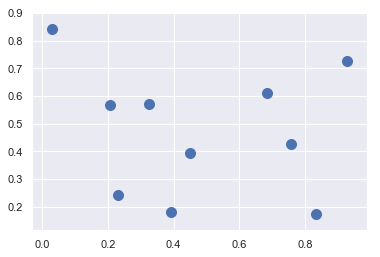

In [22]:
"""Example: k-Nearest Neighbors"""
X = rand.rand(10, 2)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1], s=100)

In [25]:
X[:,np.newaxis,:]

array([[[0.23089383, 0.24102547]],

       [[0.68326352, 0.60999666]],

       [[0.83319491, 0.17336465]],

       [[0.39106061, 0.18223609]],

       [[0.75536141, 0.42515587]],

       [[0.20794166, 0.56770033]],

       [[0.03131329, 0.84228477]],

       [[0.44975413, 0.39515024]],

       [[0.92665887, 0.727272  ]],

       [[0.32654077, 0.57044397]]])

In [26]:
X[:,np.newaxis,:].shape

(10, 1, 2)

In [27]:
X[np.newaxis,:,:]

array([[[0.23089383, 0.24102547],
        [0.68326352, 0.60999666],
        [0.83319491, 0.17336465],
        [0.39106061, 0.18223609],
        [0.75536141, 0.42515587],
        [0.20794166, 0.56770033],
        [0.03131329, 0.84228477],
        [0.44975413, 0.39515024],
        [0.92665887, 0.727272  ],
        [0.32654077, 0.57044397]]])

In [28]:
X[np.newaxis,:,:].shape

(1, 10, 2)

In [34]:
differences = X[:,np.newaxis,:] - X[np.newaxis,:,:]
differences.shape

(10, 10, 2)

In [35]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [36]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [37]:
# check the diagonal of this matrix: the distances btw each point and itself
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
print(dist_sq)

[[0.         0.34077808 0.36734458 0.02910959 0.30897025 0.10724327
  0.40134515 0.07165428 0.72052468 0.11766489]
 [0.34077808 0.         0.21312693 0.26836165 0.03936422 0.22771985
  0.47899687 0.10068562 0.0729948  0.12881554]
 [0.36734458 0.21312693 0.         0.19556145 0.06945687 0.54644225
  1.09046826 0.19621568 0.31554885 0.41437041]
 [0.02910959 0.26836165 0.19556145 0.         0.1917251  0.18211523
  0.5650824  0.04877736 0.58392964 0.15486817]
 [0.30897025 0.03936422 0.06945687 0.1917251  0.         0.3199873
  0.6982422  0.09429615 0.12061697 0.20499577]
 [0.10724327 0.22771985 0.54644225 0.18211523 0.3199873  0.
  0.1065942  0.08824681 0.54201754 0.01407328]
 [0.40134515 0.47899687 1.09046826 0.5650824  0.6982422  0.1065942
  0.         0.37502203 0.81487163 0.16105668]
 [0.07165428 0.10068562 0.19621568 0.04877736 0.09429615 0.08824681
  0.37502203 0.         0.33774299 0.04590943]
 [0.72052468 0.0729948  0.31554885 0.58392964 0.12061697 0.54201754
  0.81487163 0.3377429

In [39]:
# The leftmost columns give the indices of the nearest neighbors
nearest = np.argsort(dist_sq, axis=1)
# the 1st column gives the number 0 through 9 in order: each point's cloest neighbor is itself
print(nearest)

[[0 3 7 5 9 4 1 2 6 8]
 [1 4 8 7 9 2 5 3 0 6]
 [2 4 3 7 1 8 0 9 5 6]
 [3 0 7 9 5 4 2 1 6 8]
 [4 1 2 7 8 3 9 0 5 6]
 [5 9 7 6 0 3 1 4 8 2]
 [6 5 9 7 0 1 3 4 8 2]
 [7 9 3 0 5 4 1 2 8 6]
 [8 1 4 2 7 9 5 3 0 6]
 [9 5 7 0 1 3 6 4 8 2]]


In [40]:
# to find the nearest k neighbors, partition each row so that the smallest k+1 squred distances come first
# k+1: to include the k neighbors and the point itself
k = 2
nearest_partition = np.argpartition(dist_sq, k+1, axis=1)

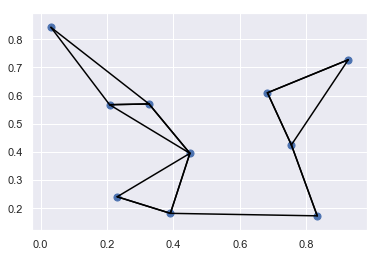

In [49]:
plt.scatter(X[:,0], X[:,1], s=50)
# draw lines from each point to its 2 nearest neighbors
# loop through point 0 to 9
for i in range(X.shape[0]):
    # loop thought the point i and 2 nearest neighbors, including the point itself
    for j in nearest_partition[i, :k+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic 
        plt.plot((*zip(X[i], X[j])), color='black')

In [46]:
nearest[1,:3]

array([1, 4, 8], dtype=int64)